In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load the data
data_path = '/content/covid19_data.csv'
df = pd.read_csv(data_path)

In [4]:
# Define columns to keep
columns_to_keep = [
    'iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
    'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million',
    'total_deaths_per_million', 'new_deaths_per_million', 'population',
    'population_density', 'median_age', 'aged_65_older', 'gdp_per_capita',
    'life_expectancy', 'human_development_index'
]

In [5]:
# Subset the DataFrame to keep only the required columns
df = df[columns_to_keep]

In [6]:
# Clean the data
df['date'] = pd.to_datetime(df['date'])
df['location'].fillna('Unknown', inplace=True)  # Example of handling missing values

In [7]:
# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44150 entries, 0 to 44149
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  44150 non-null  object        
 1   continent                 42200 non-null  object        
 2   location                  44150 non-null  object        
 3   date                      44150 non-null  datetime64[ns]
 4   total_cases               44047 non-null  float64       
 5   new_cases                 44007 non-null  float64       
 6   total_deaths              41814 non-null  float64       
 7   new_deaths                41795 non-null  float64       
 8   total_cases_per_million   44047 non-null  float64       
 9   new_cases_per_million     44007 non-null  float64       
 10  total_deaths_per_million  41814 non-null  float64       
 11  new_deaths_per_million    41795 non-null  float64       
 12  population        

In [8]:
# Display summary statistics
print(df.describe())

                                date   total_cases     new_cases  \
count                          44150  4.404700e+04  4.400700e+04   
mean   2021-06-16 01:12:53.816534528  2.331782e+06  6.530590e+03   
min              2020-01-01 00:00:00  1.000000e+00  0.000000e+00   
25%              2020-10-24 00:00:00  4.032000e+03  0.000000e+00   
50%              2021-06-16 00:00:00  3.608600e+04  3.700000e+01   
75%              2022-02-06 00:00:00  3.425760e+05  7.245000e+02   
max              2022-10-03 00:00:00  1.857206e+08  1.100729e+06   
std                              NaN  1.310769e+07  4.020582e+04   

       total_deaths    new_deaths  total_cases_per_million  \
count  4.181400e+04  41795.000000             44047.000000   
mean   3.707790e+04     72.380763             56322.428105   
min    1.000000e+00      0.000000                 0.001000   
25%    7.000000e+01      0.000000               987.109000   
50%    6.285000e+02      0.000000              8232.251000   
75%    8.338750

In [9]:
# Check for missing values
print(df.isnull().sum())

iso_code                       0
continent                   1950
location                       0
date                           0
total_cases                  103
new_cases                    143
total_deaths                2336
new_deaths                  2355
total_cases_per_million      103
new_cases_per_million        143
total_deaths_per_million    2336
new_deaths_per_million      2355
population                     0
population_density          3785
median_age                  7515
aged_65_older               7516
gdp_per_capita              5652
life_expectancy             1951
human_development_index     7505
dtype: int64


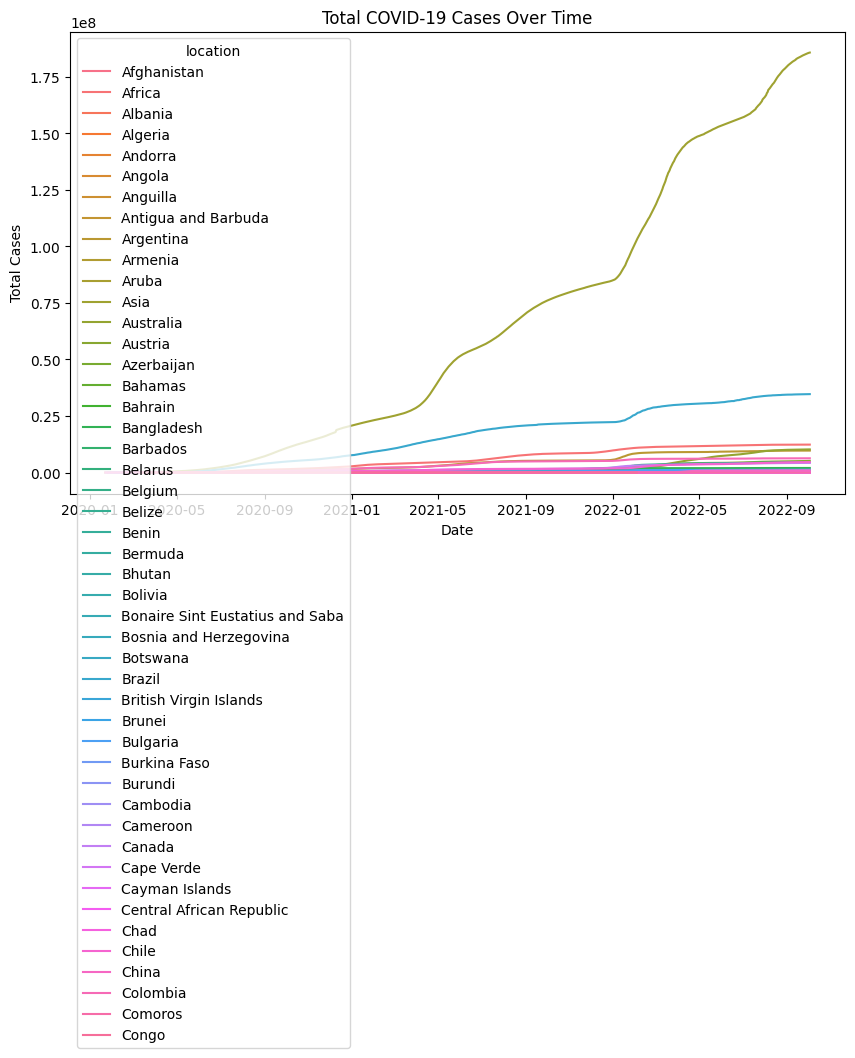

In [10]:
# Example of plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='total_cases', data=df, hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()

In [11]:
# Example of plotting with Plotly
fig = px.line(df, x='date', y='total_cases_per_million', color='location', title='Total COVID-19 Cases per Million')
fig.show()